   #               Usando Regressão Linear Para Prever Preços de Apartamentos

<br>

### Previsão de Preços dos Imóveis

Conhecer os preços de imóveis através da realização de predições torna muito mais fácil o trabalho para quem pretende vender ou comprar. Muitos fatores são levados em consideração na hora de definir o preço de um apartamento por exemplo, como localização, área, número de quartos, número de banheiros, vaga de garam, condomínio, entre outros. Imóveis com preços adequados ao mercado são mais procurados, dessa forma, o uso da previsão de preços aparece como uma forma estratégica para que resultados satisfatotios sejam alcançados em negociações imobiliarias.

### Modelo de Regressão Linear

O modelo de Regressão linear é um algoritmo do tipo supervisionado de machine learning utilizado para mensurar valores a partir de uma vários outros dados. O modelo de Regressão linear pode ser aplicada  em problemas onde as variáveis de entrada e saída são valores contínuos, como na predição dos preços de apartamentos. Esse algoritmo funciona quando existe uma correlação linear satisfatória entre os dados.

### Sobre os Dados
Como ja mencionado anteriormente, vamos realisar a predição dos preços de apartamentos através do modelo algoritimo de Regressão Linear. Todas as informações referentes ao bairro Menino Deus, localizado no município brasileiro de Porto Alegre-RS. Os dados sobre os apartamentos possuem as seguitnes variaveis: valor do imóvel(em reais), area(m²), número de quartos, número de banheiros, número de vagas de garagem e	valor do condominio(em reais).

<br>

#### Importando Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<br>

#### Importando Arquivo csv e Criando DataFrame

In [2]:
pd.read_csv('preco_aps_poa_2021.csv') # Importando arquivo csv
df = pd.read_csv('preco_aps_poa_2021.csv') # Criando DataFrame
df.head() # Exibindo as primeiras linhas do arquivo

,valor_reais,area_m²,n_quartos,banheiros,vaga_garagem,condominio_reais
0,320000,31,1,1,1,240
1,330000,80,2,1,0,240
2,390000,78,2,1,0,258
3,610000,112,2,3,1,900
4,610000,93,3,3,1,771


<br>

#### Explorando os Dados
A visão exploratória feita previamente auxilia na realização de qualquer análise e um conjunto de dados

In [3]:
df.info() # Informações sobre os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   valor_reais       53 non-null     int64
 1   area_m²           53 non-null     int64
 2   n_quartos         53 non-null     int64
 3   banheiros         53 non-null     int64
 4   vaga_garagem      53 non-null     int64
 5   condominio_reais  53 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


+ O arquivo possui 53 linhas e 6 colunas
+ Todas as colunas possuem dados com números inteiros(float64)
+ Não há dados nulos
+ O tamanho do arquivo é de 2.6KB

In [4]:
df.describe() # Estatística descritva dos dados

,valor_reais,area_m²,n_quartos,banheiros,vaga_garagem,condominio_reais
count,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000
mean,4.849038e+05,78.547170,2.018868,1.641509,0.622642,450.452830
std,2.283606e+05,34.915594,0.796400,0.736268,0.627155,302.406856
min,1.800000e+05,31.000000,1.000000,1.000000,0.000000,148.000000
25%,3.300000e+05,57.000000,2.000000,1.000000,0.000000,240.000000
50%,4.300000e+05,71.000000,2.000000,1.000000,1.000000,315.000000
75%,5.990000e+05,91.000000,2.000000,2.000000,1.000000,600.000000
max,1.330000e+06,207.000000,5.000000,3.000000,2.000000,1800.000000


<br>

#### Visualização das Variáveis 
Plotando um gráfico de linha de todas as variáveis em relação ao valor dos imóveis(valor_reais).

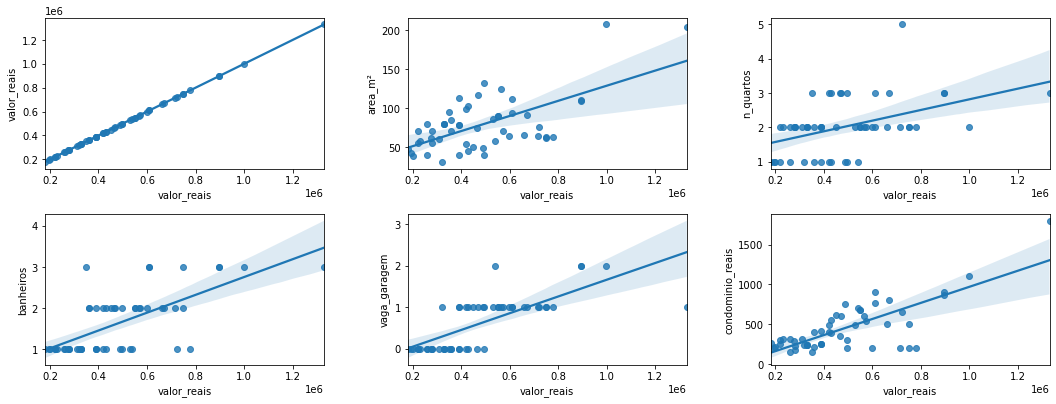

In [5]:
plt.figure(1, figsize=(18,10))
n = 0
for x in ['valor_reais']:
    for y in ['valor_reais','area_m²', 'n_quartos', 'banheiros', 'vaga_garagem', 'condominio_reais']:
        n += 1
        plt.subplot(3 , 3, n )
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

<br>

#### Correlação Entre as Variáveis 
Para a criação de um modelo de regressão linear, é necessario que as variáveis preditoras possuam correlação com a variável alvo. Para isso, as correlações devem alcançar um valor a partir de 0,5 para serem consideradas satisfatórias para uso, quanto mais próximo de 1, maior será a correlação.

In [6]:
df.corr() # Verificando correlação

,valor_reais,area_m²,n_quartos,banheiros,vaga_garagem,condominio_reais
valor_reais,1.000000,0.633985,0.445604,0.670213,0.734302,0.762929
area_m²,0.633985,1.000000,0.519694,0.654109,0.288006,0.694115
n_quartos,0.445604,0.519694,1.000000,0.470911,0.091535,0.333576
banheiros,0.670213,0.654109,0.470911,1.000000,0.451047,0.558961
vaga_garagem,0.734302,0.288006,0.091535,0.451047,1.000000,0.619954
condominio_reais,0.762929,0.694115,0.333576,0.558961,0.619954,1.000000


A variavel alvo(valor_reais) possui maior correlação com "condominio_reais"(0,76) e menor com "n_quartos"(0,44)

<br>

O gráfico a seguir permite uma melhor visualização da matriz de correlação.

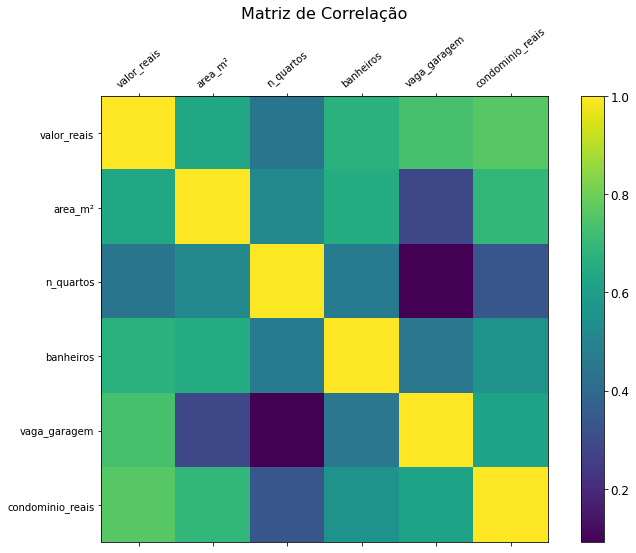

In [7]:
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=40)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Matriz de Correlação', fontsize=16);

<br>

#### Realizando a Modelagem
+ Preparando os dados
+ Divisão dos dados de treino e teste
+ Criando o treinamento dos dados
+ Testando modelo

In [8]:
x = df[['area_m²', 'n_quartos', 'banheiros', 'vaga_garagem', 'condominio_reais']] # Variável independente(atributos)
y = df['valor_reais'] # Variável alvo(saída estimada)

Criando o objeto de classe de regressão linear com as variáveis a serem utilizadas dividino os dados de treino(70%) e teste(30%).

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2) 

Gerando o treinamento do modelo através da função ".fit( )", passando por parâmetro os dados "x treino" e  "y treino".

In [10]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x_train, y_train) # Treinando os dados com modelo

LinearRegression()

Testando o modelo com a função ".predict( )", passando por parâmetro os dados "x teste".


In [11]:
modelo.predict(x_test)

array([310378.61178704, 757202.1093136 , 305460.5930272 , 975362.59988137,
       517194.65646824, 388797.92536574, 774508.62410604, 725737.56952581,
       213019.83215845, 982272.11883986, 533808.22446874])

<br>

#### Avaliando o Modelo
As métricas de validação são usadas para mensurar a eficácia de cada algoritimo utilizado. Nesse caso, R² é a métrica que representa o quão próximos os dados estão da linha de regressão ajustada. R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Essa medida estatística mostra a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra.

In [12]:
acuracia = modelo.score(x_test, y_test)
acuracia

0.8959193364125055

Vemos que o modelo alcançou uma acurácia de 89%, considerado satisfatório para uso.

<br>

### Conclusões

+ O modelo gerado para a predição dos preços de apartamentos mostrou uma eficácia de 89% em sua performance, considerado satisfatório para uso.


+ Por meio do algoritimo de Regressão Linear aqui criado, fica mais prático de chegar aos valores adequados dos apartamentos, o que leva a negociações mais satisfatórias no mercado imobiliário. 

<br>